In [26]:
import pandas as pd
import markdown
from pandas_profiling import ProfileReport
from IPython.display import display
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import ipywidgets as widgets

In [2]:
dtypes = {
    'CrimeDate': 'object',
    'CrimeTime': 'object',
    'CrimeCode': 'object',
    'Location': 'object',
    'Description': 'object',
    'Inside/Outside': 'object',
    'Weapon': 'object',
    'Post': 'object',
    'District': 'object',
    'Neighborhood': 'object',
    'Longitude': 'float64',
    'Latitude': 'float64',
    'Location 1': 'object',
    'Premise': 'object',
    'vri_name1': 'object',
    'Total Incidents': 'int64',
    
}

In [3]:
df=pd.read_csv('Baltimore911.csv',dtype=dtypes)

In [4]:
df.sample(5)

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Location 1,Premise,vri_name1,Total Incidents
22410,08/06/2019,20:00:00,7A,3000 E FAYETTE ST,AUTO THEFT,O,NaN,224,SOUTHEAST,ELLWOOD PARK/MONUMEN,-76.574122,39.294797,NaN,STREET,NaN,1
169882,08/20/2016,4:00:00,4C,1400 BLOOMFIELD AVE,AGG. ASSAULT,I,OTHER,832,SOUTHWEST,VIOLETVILLE,-76.666630,39.261793,NaN,HOTEL/MOTEL,NaN,1
63148,09/28/2018,11:00:00,5A,1500 DUNDALK AVE,BURGLARY,I,NaN,234,SOUTHEAST,GRACELAND PARK,-76.532820,39.276757,NaN,ROW/TOWNHOUSE-OCC,NaN,1
85820,04/17/2018,11:10:00,5A,700 W HAMBURG ST,BURGLARY,I,NaN,932,SOUTHERN,WASHINGTON VILLAGE,-76.627833,39.280800,NaN,ROW/TOWNHOUSE-OCC,NaN,1
185675,04/28/2016,10:12:00,6C,1300 E FAYETTE ST,LARCENY,I,NaN,211,SOUTHEAST,WASHINGTON HILL,-76.599607,39.292468,NaN,RETAIL/SMALL BUSINES,NaN,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292761 entries, 0 to 292760
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        292761 non-null  object 
 1   CrimeTime        292735 non-null  object 
 2   CrimeCode        292761 non-null  object 
 3   Location         291425 non-null  object 
 4   Description      292761 non-null  object 
 5   Inside/Outside   259001 non-null  object 
 6   Weapon           61532 non-null   object 
 7   Post             290385 non-null  object 
 8   District         292761 non-null  object 
 9   Neighborhood     282257 non-null  object 
 10  Longitude        291126 non-null  float64
 11  Latitude         291126 non-null  float64
 12  Location 1       0 non-null       object 
 13  Premise          258749 non-null  object 
 14  vri_name1        34584 non-null   object 
 15  Total Incidents  292761 non-null  int64  
dtypes: float64(2), int64(1), object(13)
me

In [6]:
df['Location 1'].unique()

array([nan], dtype=object)

#### We can drop Location 1 column

In [7]:
df.drop('Location 1', axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292761 entries, 0 to 292760
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        292761 non-null  object 
 1   CrimeTime        292735 non-null  object 
 2   CrimeCode        292761 non-null  object 
 3   Location         291425 non-null  object 
 4   Description      292761 non-null  object 
 5   Inside/Outside   259001 non-null  object 
 6   Weapon           61532 non-null   object 
 7   Post             290385 non-null  object 
 8   District         292761 non-null  object 
 9   Neighborhood     282257 non-null  object 
 10  Longitude        291126 non-null  float64
 11  Latitude         291126 non-null  float64
 12  Premise          258749 non-null  object 
 13  vri_name1        34584 non-null   object 
 14  Total Incidents  292761 non-null  int64  
dtypes: float64(2), int64(1), object(12)
memory usage: 33.5+ MB


### Create a dataset profile table that gives an overview of the dataset.

In [9]:
# Create a profile report
profile = ProfileReport(df, title='Dataset Profile Report', explorative=True)

# Generate the report
profile.to_file('profile_report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Comments
- There are some duplicate rows which can be dropped.
- 88% of vri_name1 is missing.
- The presence of free text in the "Description" column makes it difficult to analyze the data using traditional machine learning techniques.
- The missing values in the "Weapon" column suggest that the data collection process is incomplete.
- The "District" column has a 10 unique values. This suggests that the city is divided into 10 police districts.
- Most crimes are around downtown and surrounding "Neighborhood" 's.
- There is only one unique value in 'Total Incidents' i.e 1 hence count of rows give total crimes.

**Generate a series of plots to describe the temporal pattern (year-to-year, monthly, and day-of-week) of the overall crime incidence aggregating from all geo-locations;**

In [10]:
%matplotlib inline

In [11]:
df['DateTime'] = pd.to_datetime(df['CrimeDate'] + ' ' + df['CrimeTime'])

In [12]:
df['Year'] = df['DateTime'].dt.year
df['Month'] = df['DateTime'].dt.month
df['Weekday'] = df['DateTime'].dt.day_name()

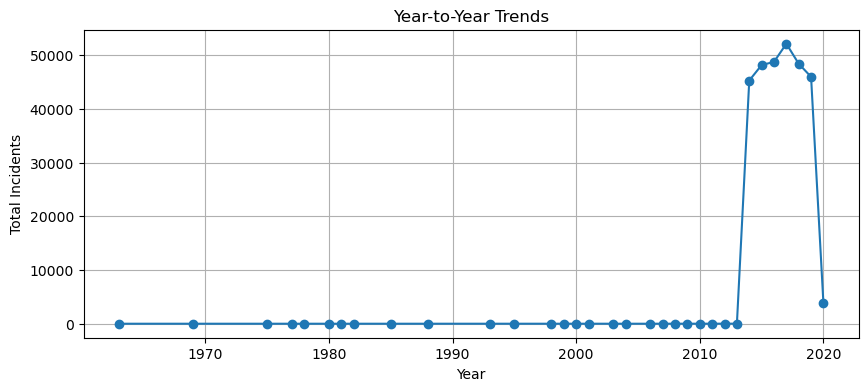

In [13]:
yearly_data = df.groupby('Year')['Total Incidents'].sum()
plt.figure(figsize=(10, 4))
plt.plot(yearly_data.index, yearly_data.values, marker='o')
plt.title('Year-to-Year Trends')
plt.xlabel('Year')
plt.ylabel('Total Incidents')
plt.grid(True)
plt.show()


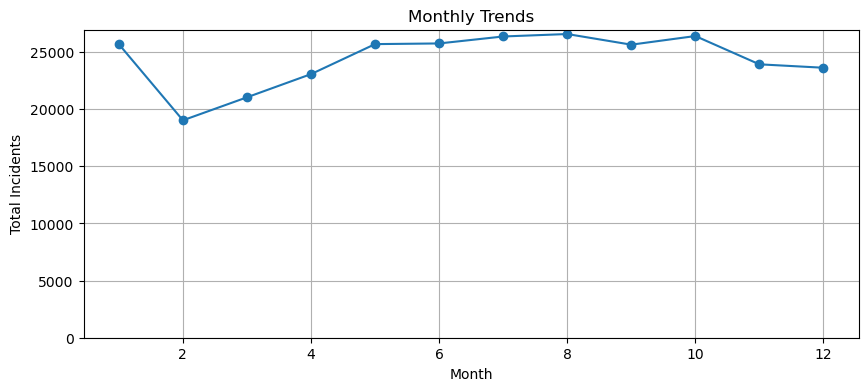

In [14]:
monthly_data = df.groupby('Month')['Total Incidents'].sum()
plt.figure(figsize=(10, 4))
plt.plot(monthly_data.index, monthly_data.values, marker='o')
plt.title('Monthly Trends')
plt.xlabel('Month')
plt.ylabel('Total Incidents')
plt.ylim(0)
plt.grid(True)
plt.show()

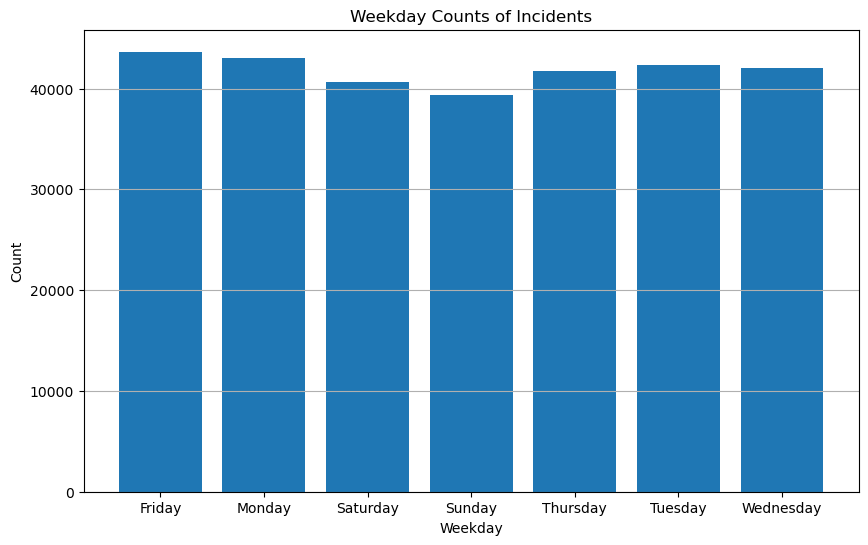

In [15]:
counts = df['Weekday'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(counts.index, counts.values)
plt.title('Weekday Counts of Incidents')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.grid(axis='y')

### Generate a plot describing the distribution of crime type aggregating from all geo-locations and all time periods;

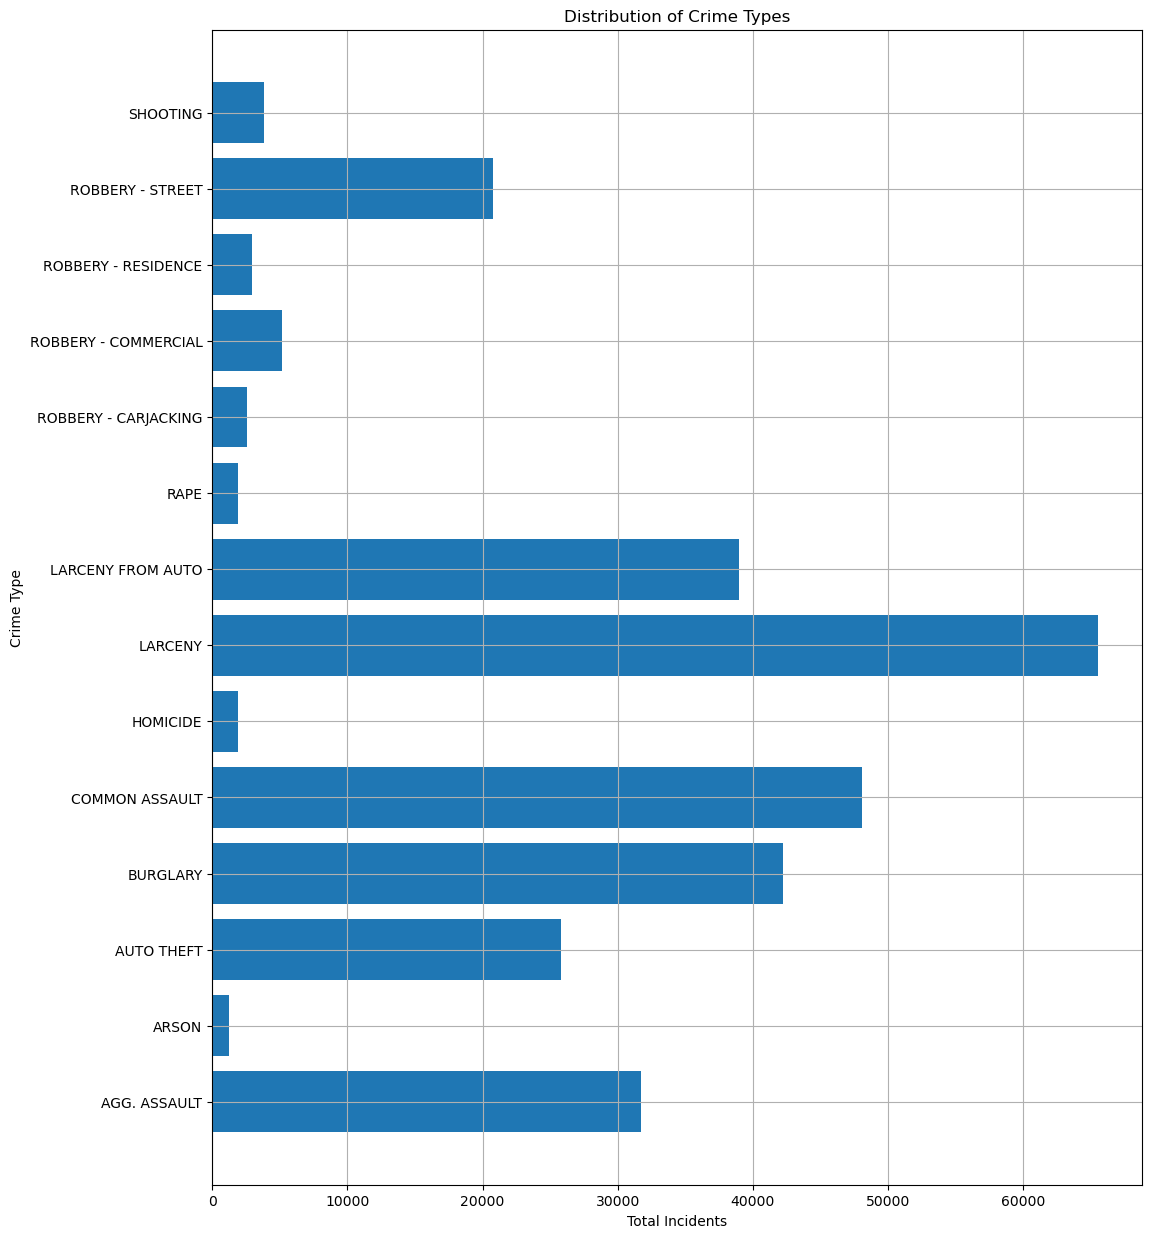

In [16]:
crime_type_data = df.groupby('Description')['Total Incidents'].sum()

plt.figure(figsize=(12, 15))
plt.barh(crime_type_data.index, crime_type_data.values)

plt.title('Distribution of Crime Types')
plt.xlabel('Total Incidents')
plt.ylabel('Crime Type')
plt.grid(True)

plt.show()

### Generate a series of plots to illustrate how crime type distributions might vary from year-to-year, month-to-month, or by day-of-week aggregating across all locations.

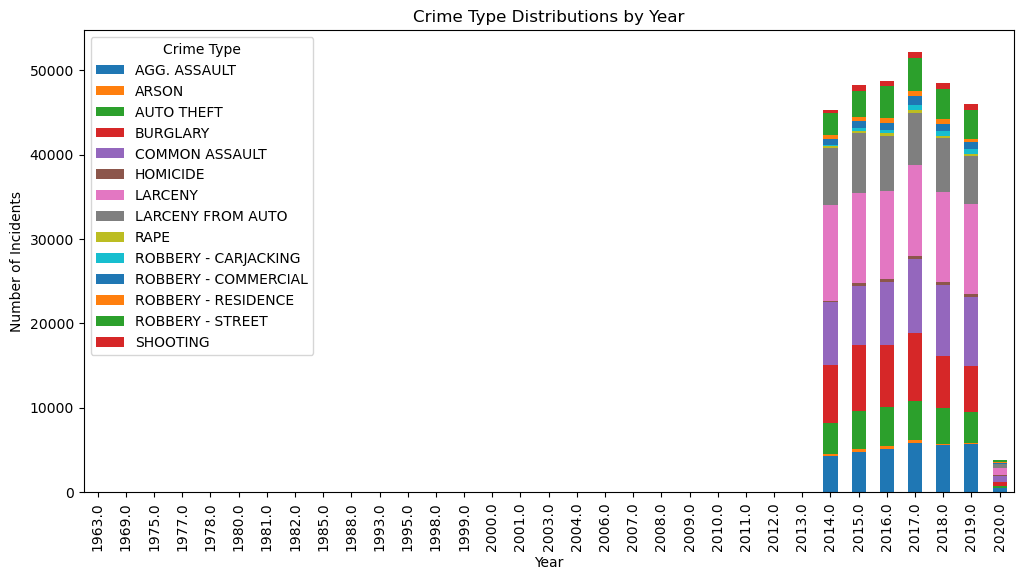

In [17]:
yearly_crime_type_counts = df.groupby(['Year', 'Description']).size().unstack(fill_value=0)

# Plot crime type distributions by year
yearly_crime_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Type Distributions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type')
plt.show()

### Above plot is not visually pleasing so finding a better alternative

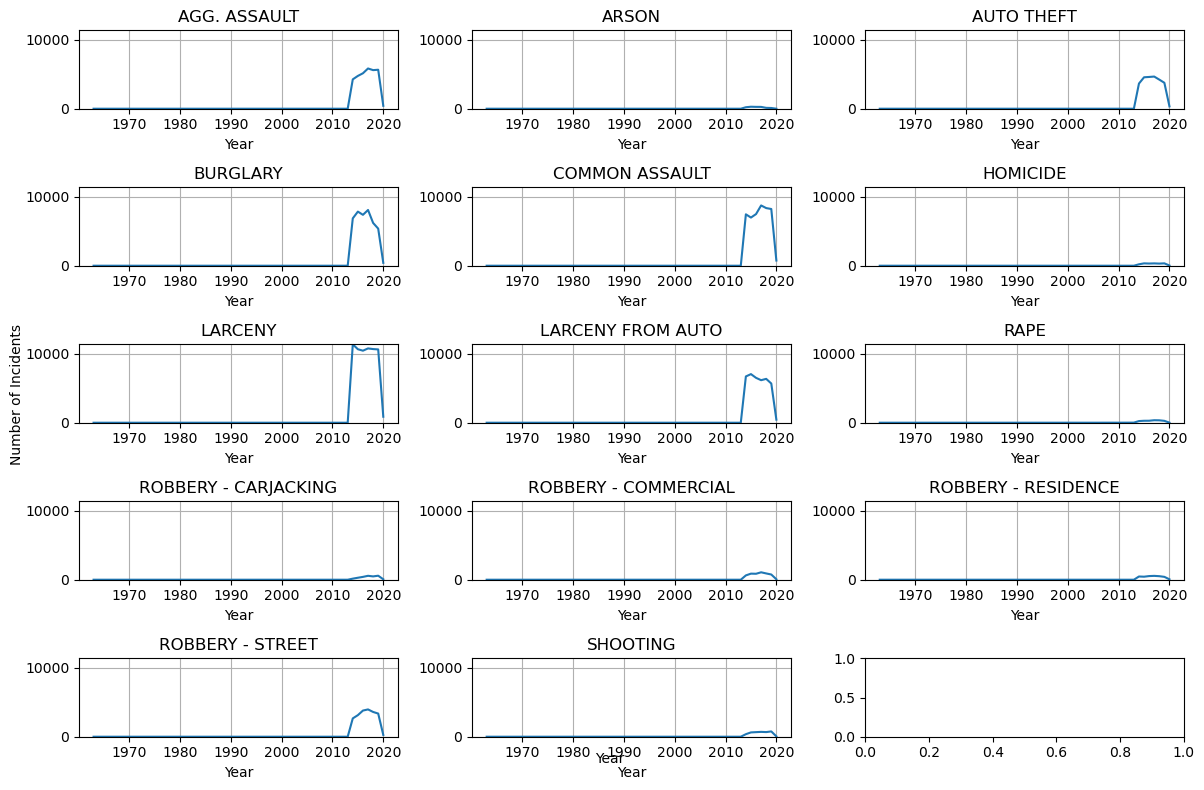

In [18]:
crime_by_year = df.pivot_table(index='Year', columns='Description', values='Total Incidents', aggfunc='sum').fillna(0)
y_max = crime_by_year.values.max()
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(12, 8))

for i, crime_type in enumerate(crime_by_year.columns):

  ax = axs[i//3, i%3]
  
  crime_by_year[crime_type].plot(ax=ax)

  ax.set_title(crime_type)
  ax.grid(True)
  ax.set_ylim(0,y_max)
  
plt.tight_layout()

fig.text(0.5, 0.04, 'Year', ha='center')

fig.text(0.0, 0.5, 'Number of Incidents', va='center', rotation='vertical') 

plt.show()

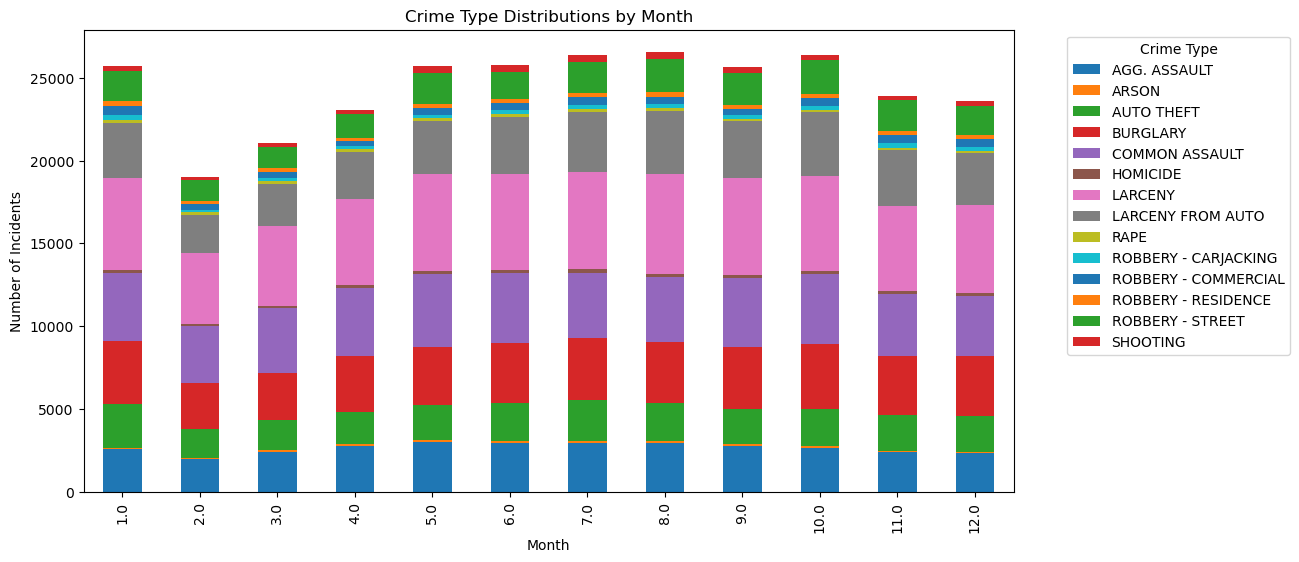

In [19]:
monthly_crime_type_counts = df.groupby(['Month', 'Description']).size().unstack(fill_value=0)

# Plot crime type distributions by year
monthly_crime_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Type Distributions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type',bbox_to_anchor=(1.05, 1))
plt.show()

### Plotting a better plot

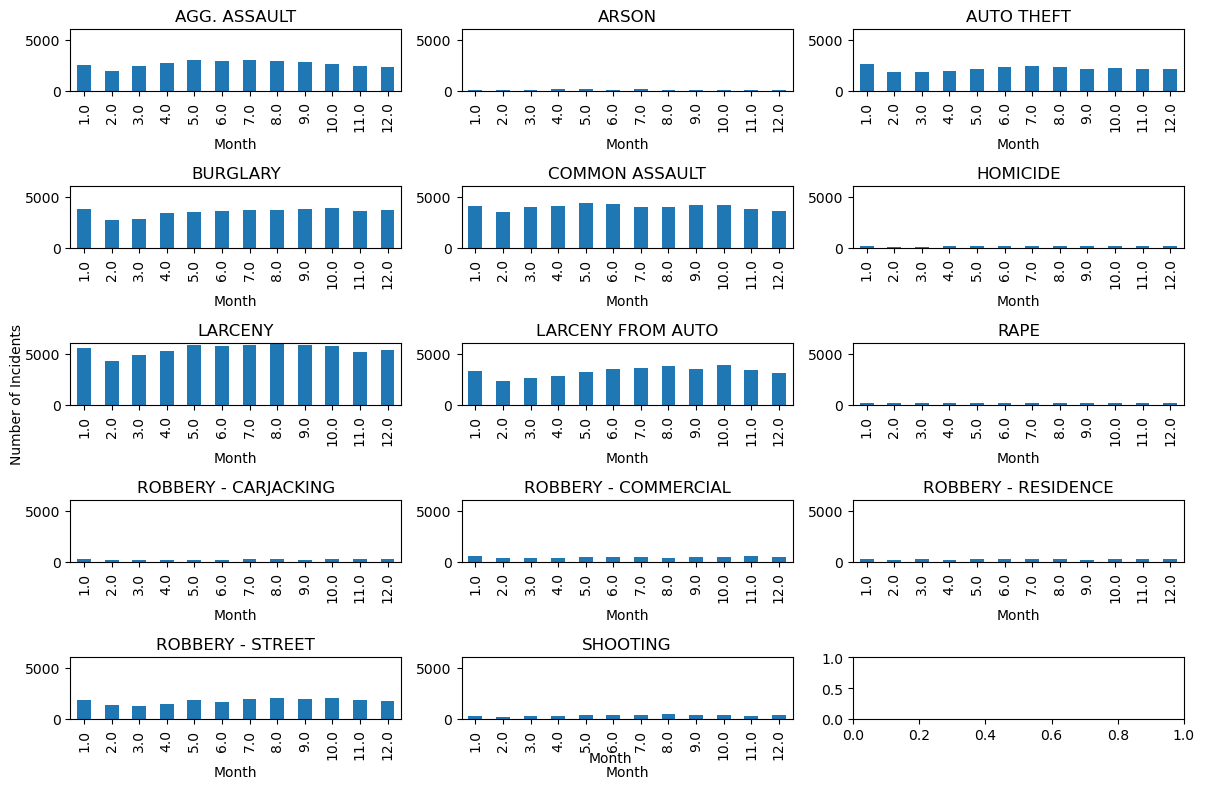

In [20]:
monthly_crime_by_type = df.pivot_table(index='Month', columns='Description', values='Total Incidents', aggfunc='sum').fillna(0)
y_max = monthly_crime_by_type.values.max()
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(12, 8))


for i, crime_type in enumerate(monthly_crime_by_type.columns):

  
  ax = axs[i//3, i%3] 
  
  
  monthly_crime_by_type[crime_type].plot(kind='bar', ax=ax)

  
  ax.set_title(crime_type)
  ax.set_xlabel('Month')
  ax.set_ylim(0,y_max)


plt.tight_layout()

# fig.suptitle('Monthly Crime Trends by Type', fontsize=20)
fig.text(0.0, 0.5, 'Number of Incidents', va='center', rotation='vertical') 

fig.text(0.5, 0.04, 'Month', ha='center') 


plt.show()

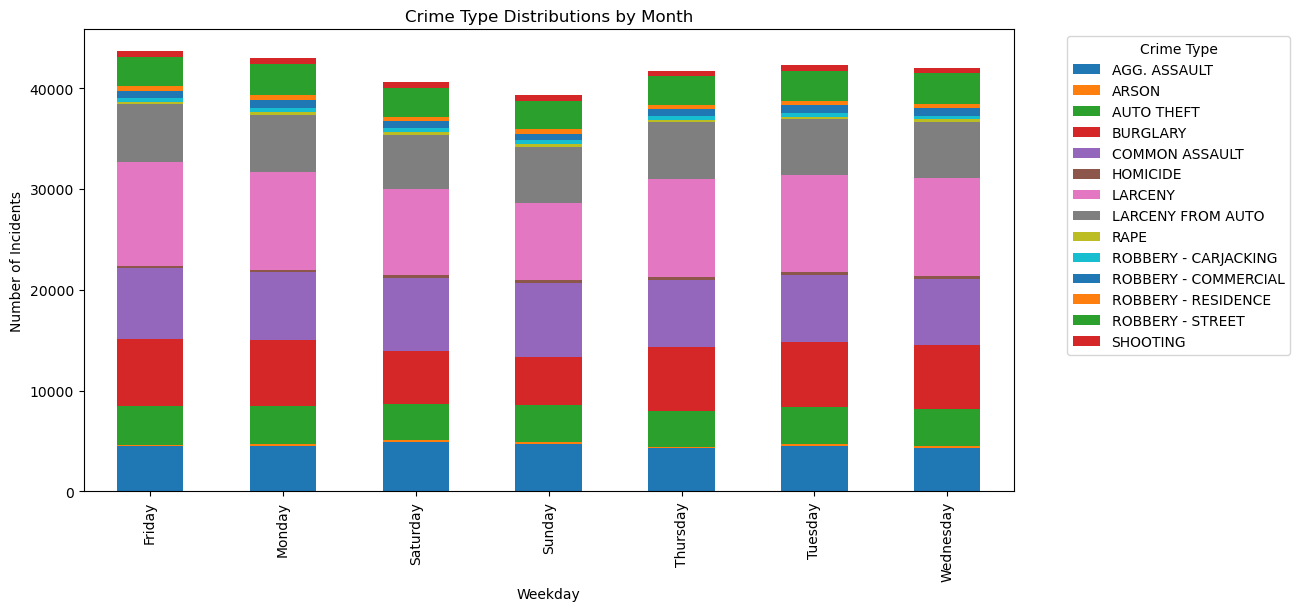

In [21]:
Weekday_crime_type_counts = df.groupby(['Weekday', 'Description']).size().unstack(fill_value=0)

Weekday_crime_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Crime Type Distributions by Month')
plt.xlabel('Weekday')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type',bbox_to_anchor=(1.05, 1))
plt.show()

In [22]:
#pip install folium
#pip install dash

In [23]:
data=df
data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

In [24]:
data['Description'].unique()

array(['BURGLARY', 'LARCENY', 'ROBBERY - RESIDENCE', 'AUTO THEFT',
       'ROBBERY - COMMERCIAL', 'ROBBERY - STREET', 'COMMON ASSAULT',
       'SHOOTING', 'AGG. ASSAULT', 'LARCENY FROM AUTO',
       'ROBBERY - CARJACKING', 'HOMICIDE', 'RAPE', 'ARSON'], dtype=object)

### Design a dashboard that allows users like Gary to explore the spatial and temporal patterns of crime. 

In [27]:
import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# Initialize the Dash app
app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    html.H1("Crime Exploration Dashboard"),
    
    # Dropdown for selecting a crime type
    dcc.Dropdown(
        id='crime-type-dropdown',
        options=[
            {'label': 'COMMON ASSAULT', 'value': 'COMMON ASSAULT'},
            {'label': 'LARCENY', 'value': 'LARCENY'},
            {'label':'BURGLARY','value':'BURGLARY'},
            {'label':'ROBBERY - RESIDENCE','value':'ROBBERY - RESIDENCE'},
            {'label':'AUTO THEFT','value':'AUTO THEFT'},
            {'label':'ROBBERY - COMMERCIAL','value':'ROBBERY - COMMERCIAL'},
            {'label':'ROBBERY - STREET','value':'ROBBERY - STREET'},
            {'label':'RAPE','value':'RAPE'},
            {'label':'SHOOTING','value':'SHOOTING'},
            {'label':'AGG. ASSAULT','value':'AGG. ASSAULT'},
            {'label':'LARCENY FROM AUTO','value':'LARCENY FROM AUTO'},
            {'label':'ROBBERY - CARJACKING','value':'ROBBERY - CARJACKING'},
            {'label':'HOMICIDE','value':'HOMICIDE'},
            {'label':'ARSON','value':'ARSON'},
        ],
        value='COMMON ASSAULT',
        multi=False
    ),
    
    # Scatter map for displaying crime locations
    dcc.Graph(id='crime-location-map'),
    
    # Time series plot for crime over time
    dcc.Graph(id='crime-over-time')
])

# Callback to update the crime location map
@app.callback(
    Output('crime-location-map', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_location_map(selected_crime_type):
    filtered_data = data[data['Description'] == selected_crime_type]
    
    fig = px.scatter_mapbox(
        filtered_data,
        lat='Latitude',
        lon='Longitude',
        hover_name='Location',
        hover_data=['CrimeDate', 'CrimeTime', 'Description'],
        zoom=10
    )
    
    fig.update_layout(
        mapbox_style="carto-positron",
        margin={"r":0,"t":0,"l":0,"b":0}
    )
    
    return fig

# Callback to update the crime over time plot
@app.callback(
    Output('crime-over-time', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_crime_over_time(selected_crime_type):
    filtered_data = data[data['Description'] == selected_crime_type]
    
    fig = px.histogram(
        filtered_data,
        x='CrimeDate',
        title=f'{selected_crime_type} Over Time',
        labels={'CrimeDate': 'Date', 'count': 'Number of Incidents'},
        marginal='rug'
    )
    
    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)
